# Particle incident on a potential step and Quantum Mechanical Tunneling

In [1]:
from IPython.display import HTML
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import warnings
warnings.filterwarnings('ignore')
#function to produce complex number from Euler form.
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

#constants used later
hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters

## The classical situation:

The physical situation we are trying to model is quite simple, a particle is traveling from a negative value of $x$ in the positive $x$ direction. At some point, we usually choose the origin of our coordinate system ($x=0$) for convenience, the particle encounters a strong force acting in the negative $x$ direction. The force will be constant with time and act over a short distance. We will represent the force using a potential $U(x)$ such that:

$$
F_x(x)=-\frac{dU(x)}{dx}
$$

We can now make a schematic representation of such a force (*see figure below*). 



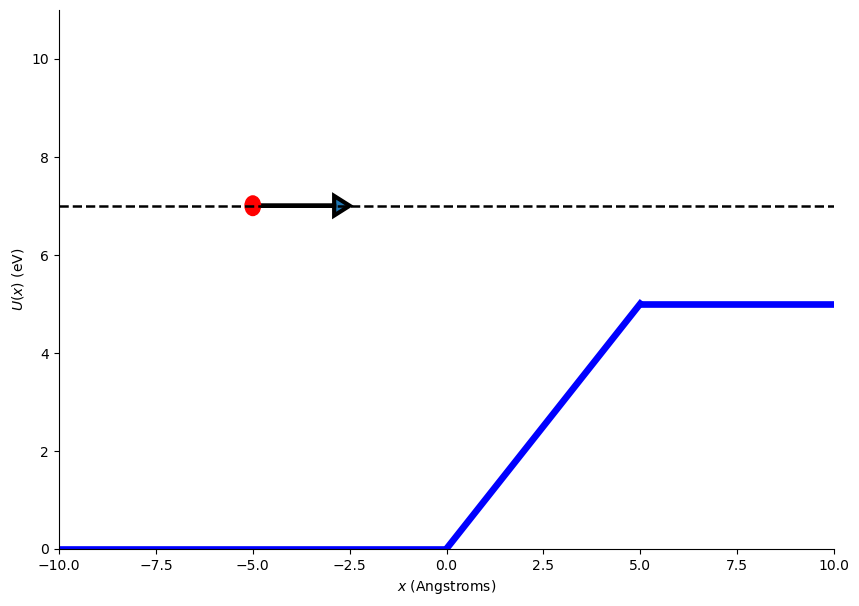

In [3]:
# Reading the input variables from the user
Vo = 5
E =  7
Vmax = 10


hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters

L=10

fig, ax = plt.subplots(figsize=(10,7))

ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
#ax.spines['left'].set_color('none')
#ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')

ax.hlines(E, -L, L, linewidth=1.8, linestyle='--', color="black")
circle1 = plt.Circle((-5, E), 0.2, color='red')
plt.arrow(-5, E, 2.5, 0, linewidth=3, length_includes_head=True,
          head_width=0.4, head_length=0.4)
ax.add_patch(circle1)

X_lef = np.linspace(0, 5, 900,endpoint=True)

ax.axis([-L,L,0.0,1.1*Vmax])
ax.set_xlabel(r'$x$ (Angstroms)')
ax.set_ylabel(r'$U(x)$ (eV)')

ax.plot(X_lef,((5)/(Vo))*X_lef, color="blue", label="Re part of $\psi_{II}$", linewidth=4.8)

ax.margins(0.00)
ax.hlines(0, -L, 0, linewidth=4.8, color="blue")
ax.hlines(Vo, 5, L, linewidth=4.8, color="blue")
plt.show()

Notice that $U(x)=0$ for $x<0$ and $U(x)$ a constant for $x>d$, lets call this constant $V$, this is a convenience that we will explore later. The change in potential energy is what causes the force so clearly the force acts in the region $0<x<d$. If the particle has a kinetic energy $K=\frac{1}{2}mv^2$ then we can write the total energy of the particle when $x<0$ as:

$$E=K+0=\frac{1}{2}mv_{x<0}^2$$

and

$$E=K+V=\frac{1}{2}mv_{x>d}^2+V$$

hence we can express the velocity of the particle as:

$$v_{x<0}=\sqrt{\frac{2E}{m}}$$

and

$$v_{x>d}=\sqrt{\frac{2(E-V)}{m}}$$

This last equation gives us the velocity after the force has acted on the particle and only has a real solution when $E>V$, *i.e.* when the particle has an initial kinetic energy $K$ greater than the height of the potential step $V$. In the converse situation where $E<V$ the solution is imaginary and the particle will never be seen in the region $x>d$, in fact it will never propagate beyond the value of $x$ which solves the equation $U(x)=K$.

This is the situation encountered when one charged particle approaches another, for example in Rutherford scattering where the $\alpha$ particles encounter the electrostatic potential of the gold nuclei which exerts a force that scatters them onto a different path. 

If the force were to act in the positive $x$ direction then the step would be reduce in height and the particles velocity would increase as the force acted on the particle. 

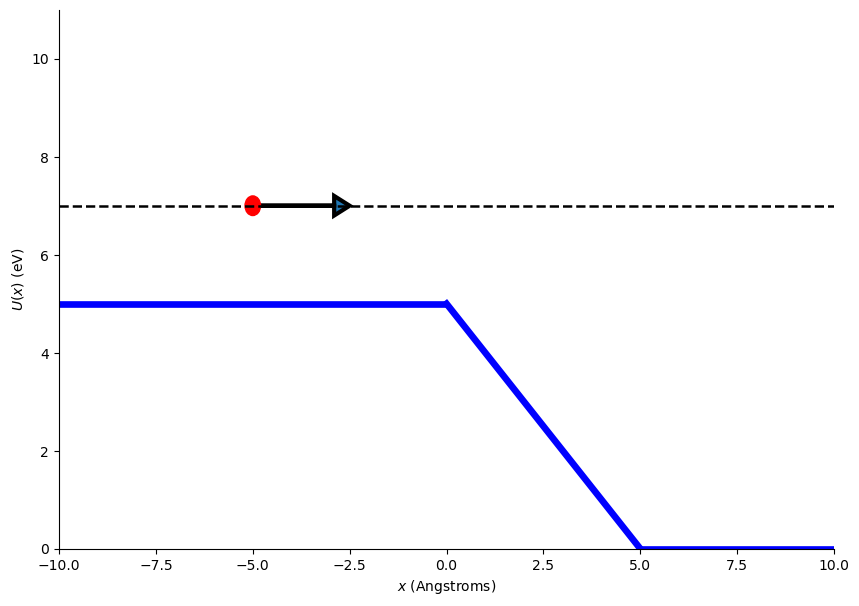

In [4]:
# Reading the input variables from the user
Vo = 5
E =  7
Vmax = 10


hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters

L=10

fig, ax = plt.subplots(figsize=(10,7))

ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
#ax.spines['left'].set_color('none')
#ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')

ax.hlines(E, -L, L, linewidth=1.8, linestyle='--', color="black")
circle1 = plt.Circle((-5, E), 0.2, color='red')
plt.arrow(-5, E, 2.5, 0, linewidth=3, length_includes_head=True,
          head_width=0.4, head_length=0.4)
ax.add_patch(circle1)

X_rig = np.linspace(0, 5, 900,endpoint=True)
X_rig = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vmax])
ax.set_xlabel(r'$x$ (Angstroms)')
ax.set_ylabel(r'$U(x)$ (eV)')

ax.plot(X_lef,((-5)/(Vo))*X_lef+Vo, color="blue", label="Re part of $\psi_{II}$", linewidth=4.8)

ax.margins(0.00)
ax.hlines(Vo, -L, 0, linewidth=4.8, color="blue")
ax.hlines(0, 5, L, linewidth=4.8, color="blue")
plt.show()

We will now proceed to look at the quantum mechanics cases where we model the particle using a wave. We will make one further modification and say that the distance over which the force acts is small so that insteat of a gentle slope there is an instant step-up or step-down at the origin. 

## The quantum mechanical description

We must now solve the time independent Schrodinger equation in order to learn what quantum mechanics can tell us about the problem outlined above. We will assume that the distance over which the force acts is small, but compared to what? As is frequently the case in quantum mechanics the relevant dimension in the deBrolie wavelength $\lambda$:

$$\lambda=\frac{h}{p}$$

where $h$ is Planck's constant and $p$ is the *initial* momentum of the particle. Don't forget this is a dynamic problem and this will change as the particle propagates through the potential that causes the force.

We will use the potential as shown in the figure below where is it convenient to label the region where $x<0$ as $I$ and the region where $x>0$ as $II$.

The TISE is:

$$\frac{-\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)$$

where $m$ is the mass of the particle being considered, $V(x)$ is the potential at $x$, $E$ is the energy eigenvalue of the particle and $\psi(x)$ is the wave function. 

## Choosing a suitable wave function before the step

In region ($I$) the potential $V(x)=0$ and the wave function takes the form:

$$\psi(x)=Ae^{ik_1x}+Be^{-ik_1x}$$

where $k_1$ is the wave number of the wave function, you may recall that this is related to the wavelength by $k=\frac{2\pi}{\lambda}$. Consider the wave function for a moment, the term with the coefficient $A$ has an exponential form but represents a wave that is propagating in the positive $x$ direction. So in this case this represents a particle with momentum $p=\hbar k$. Similarly, the term with the coefficient $B$ also represents a wave but one which propagates in the negative $x$ direction. So in this case this represents a particle with momentum $p=-\hbar k$. You can arrive at this result by applying the momentum operator to each term of the wave function just as we saw for a free particle. 

## Calculating the energy eigen values.

Note that in region $I$ the potential is zero hence $V(x)=0$. By differentiating the wave function twice and substituting into the TISE we obtain an expression for the wave number:

$$k_1=\sqrt{\frac{2mE}{\hbar}}$$

proving a convenient way to relate the energy of the particle $E$ to the wave number $k_1$.

## Choosing a suitable wave function after the step

In region $II$ the wave function will have the form:

$$\psi(x)=Ce^{-ik_2x}+De^{ik_2x}$$

Later we will show that $D=0$, which would be expected since there are no boundaries to reflect the wave for $x>0$ so it must only have positive values of $k$.

## Calculating the energy eigen values.


Note that in region $II$ the potential is not zero hence $V(x)=V$. By differentiating the wave function twice and substituting into the TISE we obtain an expression for the wave number:

$$k_2=\sqrt{\frac{2m(E-V)}{\hbar}}$$

Now recall that the problem involves a particle moving from left to right. We will see shortly that it is possible for the particle to be reflected by the step and so $B$ will be none-zero, there is no physical reason for the particle to be reflected once it has passed the step potential hence $D=0$ in this case. 

In general the coefficients $A$, $B$, $C$, and $D$ are complex so we should consider both the real and imaginary parts when plotting the wave functions. 

The equation for $k_2$ is real when $E>V$ and imaginary when $E<V$. So in the situation when $E>V$ we will use the equation for $k_2$ as provided above. In the situation when $E<V$ we will express our *'wave number'* in the form:

$$\sqrt{\frac{2m(E-V)}{\hbar}}=i\sqrt{\frac{2m(V-E)}{\hbar}}=i\beta$$

So in summary when $E>V$ our wave functions are:

$$\begin{array}[cc]
\\
\psi_I(x)=Ae^{ik_1x}+Be^{-ik_1x} & x\le0\\
\psi_{II}(x)=Ce^{-ik_2x} & x>0\\
\end{array}
$$

and when $E<V$ out wave functions are:

$$\begin{array}[cc]
\\
\psi_I(x)=Ae^{ik_1x}+Be^{-ik_1x} & x\le0\\
\psi_{II}(x)=Ce^{-\beta x} & x>0\\
\end{array}
$$

Notice that the last wave function has been chosen so that the $\psi(x)\rightarrow 0$ as $x\rightarrow \infty$.

## Boundary (or Continuity) Conditions

The wave function of the particles propagating through this potential is given by the sum of the wave function in region $I$ and region $II$. So we must now consider the conditions imposed on our wave function by the boundaries. At the boundary:

* the wave function must be continuous hence $\psi_I=\psi_{II}$
* the first derivative must also be continuous hence $\frac{d\psi_I}{dx}=\frac{d\psi_{II}}{dx}$

```{margin} Why do we check for continuity?
$\psi^{'}$ needs to be continuous to guarantee the existence of $\psi^{''}$, whose existence is required from the first postulate.  $\large{\frac{d^2}{dx^2}}$ is a component of the kinetic energy operator. If the wavefucntion doesn't have a well-defined second derivative, then the kinetic energy would be undefined, which is not possible.
```

The first condition means the wave function is single valued at $x=0$, as $|\psi|^2$ is the probability density the probability of finding the particle at $x=0$ is the same for region $I$ and region $II$. 

Examining the TISE explains why the second condition is important. If $E$ and $V(x)$ are finite, the $\frac{d^2\psi}{dx^2}$ must also be finite. This means $\frac{d\psi_I}{dx}=\frac{d\psi_{II}}{dx}$ must be continuous (see side panel for more details). 


## First we consider the situation when $E>V$

In this situation the the energy of the incident particle is greater than the potential step.

Applying the boundary conditions first for the wave function:

$$
\psi_I(0)=&\psi_{II}(0) \\
A+B=&C & (1)
$$

and now for the first derivative:

$$
\psi_I^\prime(0)=&\psi^\prime_{II}(0) \\
k_1A-k_1B=&k_2C & (2)
$$

where I have used the notation $\psi^\prime$ to represent the derivative of the wave function. 

Solving (1) and (2) simultaneously 

$$
\frac{B}{A}=\frac{k_1-k_2}{k_1+k_2}
$$

and

$$
\frac{C}{A}=\frac{2k_1}{k_1+k_2}
$$

We can now plot the wave functions of an electron as they pass over a potential step. In the following example I have set the coefficient $A=1$, chosen as a convenient value, we will consider the interpretation of the quantity later. You can set the step height ($V$) and initial kinetic energy of the particle, this can be done by following the Open in Colab link and working with the live version of these notes.

**Questions**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

Follow the link to the live google colab version of these notes and choose potential step height and total particle energy. Start initially with a positive value for $V_0$ and make initial kinetic energy greater than $V_0$.

* What happens to the wave number as the particle propagates from region $I$ to region $II$?
* Can you interpret the change in the wave number in terms of changes in the particles momentum?
* In which direction in the force produced by the potential acting and is this consistent with you answers to the first two questions?




[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

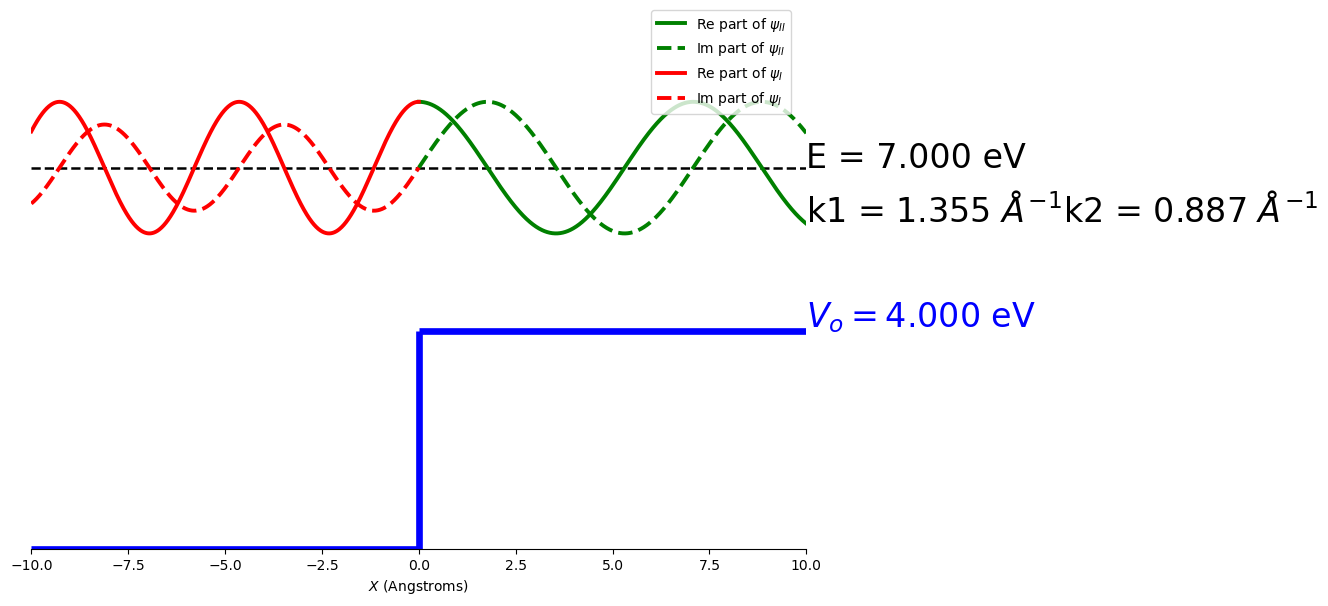

In [13]:
# Reading the input variables from the user
Vo = 4 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))

if(Vo>E):
  Vmax = Vo+2
else:
  Vmax = E+2

if(Vo>0):
  Vmin = 0
else:
  Vmin = Vo-2

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)




fig, ax = plt.subplots(figsize=(10,7))

ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')

X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,1.1*Vmin,1.1*Vmax])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
str2=r"k1 = %3.3f $\AA^{-1}$"%(k1)+r"k2 = %3.3f $\AA^{-1}$"%(k2)
ax.text(2.0*L/2.0, E-1.0, str2, fontsize=24, color="black")

ax.hlines(E, -L, L, linewidth=1.8, linestyle='--', color="black")
str1="E = %.3f eV"%(E)
ax.text(2.0*L/2.0, E, str1, fontsize=24, color="black")

#calculate the wavefunction and plot the graphs, conditional on E>Vo or not
#shift in +tive y so the zero of the wavefunction in the energy line
if((E-Vo)>0):
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=A*(k1-k2)/(k1+k2)
  C=A*2*k1/(k1+k2)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)
  psi_I  = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  #psi_II = Cexp(-ik_2x)
  psi_II = P2R(C,k2*X_II)
  ax.plot(X_II,np.real(psi_II)+E, color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II)+E, color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I)+E, color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I)+E, color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)
else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=P2R(A,-2*phi)
  C=A*2*np.cos(phi)*P2R(1,-1*phi)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)  
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  #psi_II = Cexp(-k_2x) (NB: exp term is real!! only C is complex)
  psi_II = C*np.exp(-1*k2*X_II)
  ax.plot(X_II,np.real(psi_II)+E, color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II)+E, color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I)+E, color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I)+E, color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)


ax.margins(0.00)
ax.vlines(0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L, 0, linewidth=4.8, color="blue")
ax.hlines(Vo, 0, L, linewidth=4.8, color="blue")
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

*Figure:* The wave function of a beam of particles with average kinetic energy greater than the potential energy of a step. The wave function oscillates for $x<0$ and for $x>0$. The wave function is continuous at the boundary $x=0$. The energies and wave numbers are given for each region. Note this is similar to the combined plots for the infinite square well, the dashed line if the zero of the wave function but placed on the energy axis the energy of the incident beam. 

Below the same wave function is plotted but this time without the potential energy function.

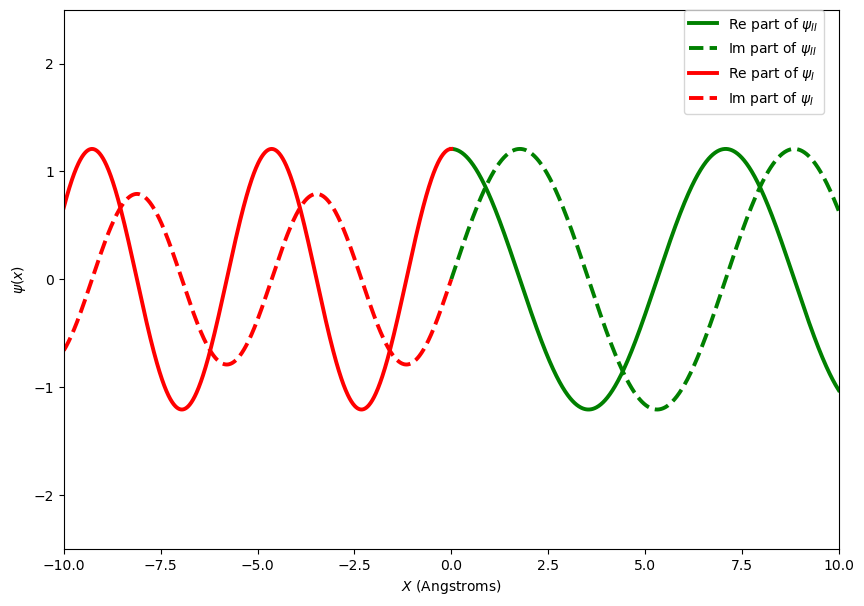

In [12]:
#@title Default title text { display-mode: "form" }
#coefficient, choose A=1+0i - convenient but arbitary choice.
Vo = 4 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar
#find k2 if E>Vo or beta (which we say = k2 for convenience below) if E<Vo
if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  #this is really beta but for convenience use k2
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  #the phase angle between real and imaginary components when E<Vo 
  phi = np.arctan(k2/k1)

fig, ax = plt.subplots(figsize=(10,7))

#An array of X values in region I and II
X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,-2.5,2.5])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$\psi(x)$')
#calculate the wavefunction and plot the graphs, conditional on E>Vo or not

if((E-Vo)>0):
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=A*(k1-k2)/(k1+k2)
  C=A*2*k1/(k1+k2)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)
  psi_I  = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  #psi_II = Cexp(-ik_2x)
  psi_II = P2R(C,k2*X_II)
  ax.plot(X_II,np.real(psi_II), color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II), color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I), color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I), color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)
else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=P2R(A,-2*phi)
  C=A*2*np.cos(phi)*P2R(1,-1*phi)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)  
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  #psi_II = Cexp(-k_2x) (NB: exp term is real!! only C is complex)
  psi_II = C*np.exp(-1*k2*X_II)
  ax.plot(X_II,np.real(psi_II), color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II), color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I), color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I), color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)
  
ax.margins(0.00)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

*Figure:* The wave function for a particle incident on a potential step at $x=0$ the incident energy is greater than the step height. This is the same plot as above but without the energy component. 

## The probability density

Now we shall turn our attention to the probability density of the wave function. Recall that this is calculated by:

$$|\psi(x)|^2=|\psi^*(x)\psi(x)|$$

where $\psi^*(x)$ is the complex conjugate of $\psi(x)$.

So far we have assumed the wave function is normalised to unity (i.e. $A^2=1$). But we have not actually performed the step of normalising so the question remains: How do we interpret the probability density function? 

The product $|\psi(x)|^2\Delta x$ is be the probability of finding the particle in the range $x$ to $x+\Delta x$. It is now convenient to modify our description to say the wave function can represent more than one particle. Specifically, the wave function $\psi(x)=Ae^{-ik_1 x}$ can represent a beam of particles all moving in the positive $x$ direction each with a momentum $\hbar k$. Of course, *Heisenberg* now tells us we can not specify the position of any one particle but we can say $|\psi(x)|^2$ is the average number of particles per unit length. 

So considering the wave functions for the two regions:
*$|A|^2$ will give us the average number of particles per unit length incident on the barrier, 
*$|B|^2$ will give us the average number of particles per unit length reflected by the barrier, 
*$|C|^2$ will give us the average number of particles per unit length transmitted past the barrier, 

Hence, our earlier assumptions of setting $A$ to 1 is the same as saying the average number of particles incident per unit length incident on the barrier is also 1. In this way we can treat our wave function as being normalised. In reality this is not needed as we are almost always looking for a ratio of this values to find the percentage of transmitted and reflected particles.

The probability density functions for the two regions are plotted below. In the combined plot **the zero of the probability density** is given by the dashed black line. 

**Questions**

* Can you explain why the probability density on the left of the barrier is different to the probability density on the right?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

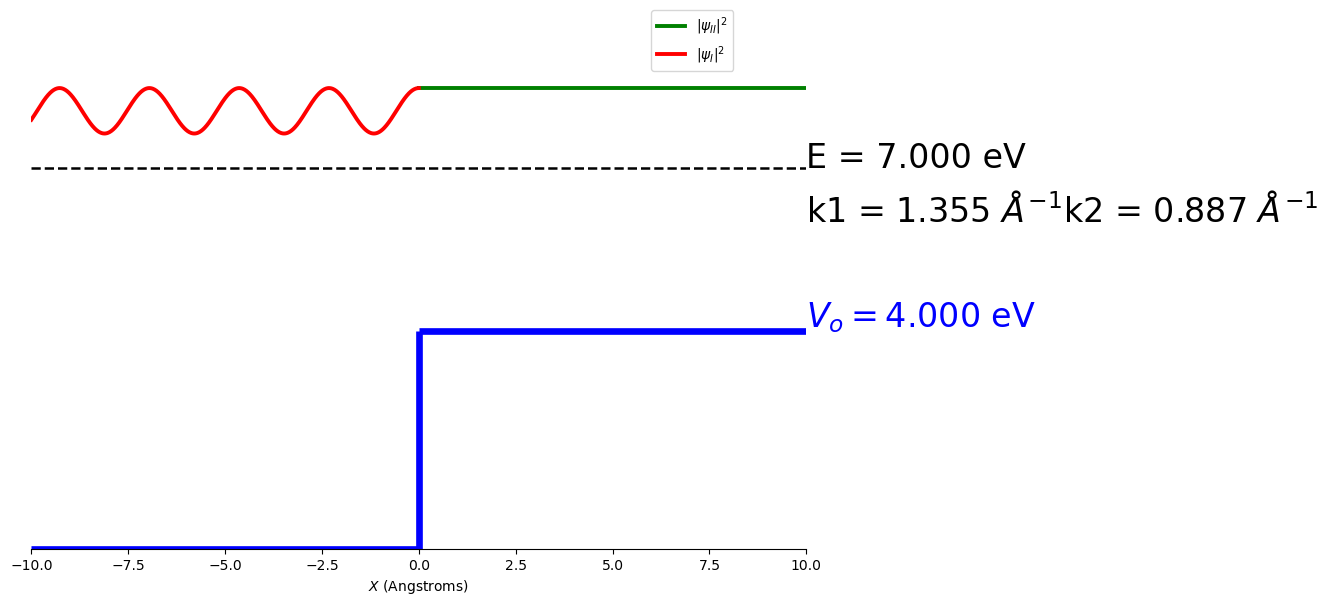

In [4]:
# Reading the input variables from the user
Vo = 4 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))

if(Vo>E):
  Vmax = Vo+2
else:
  Vmax = E+2

if(Vo>0):
  Vmin = 0
else:
  Vmin = Vo-2

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)




fig, ax = plt.subplots(figsize=(10,7))

ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')

X_lef = np.linspace(-L, 0, 900,endpoint=True)
X_rig = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,1.1*Vmin,1.1*Vmax])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
str2=r"k1 = %3.3f $\AA^{-1}$"%(k1)+r"k2 = %3.3f $\AA^{-1}$"%(k2)
ax.text(2.0*L/2.0, E-1.0, str2, fontsize=24, color="black")

ax.hlines(E, -L, L, linewidth=1.8, linestyle='--', color="black")
str1="E = %.3f eV"%(E)
ax.text(2.0*L/2.0, E, str1, fontsize=24, color="black")

if((E-Vo)>0):
  ax.plot(X_rig,0*X_rig+((2*k1/(k1+k2))**2)+E, color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_lef, (1+((k1-k2)/(k1+k2))**2+2*((k1-k2)/(k1+k2))*np.cos(2*k1*X_lef))+E, color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
else:
  ax.plot(X_rig,(4*np.cos(phi)*np.cos(phi)*np.exp(-2*k2*X_rig))+E, color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_lef,(2+2*np.cos(2*k1*X_lef+2*phi))+E, color="red", label="|$\psi_{I}|^2$", linewidth=2.8)

ax.margins(0.00)
ax.vlines(0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L, 0, linewidth=4.8, color="blue")
ax.hlines(Vo, 0, L, linewidth=4.8, color="blue")
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

*Figure:* The probability density function of a beam of particles incident on a potential step. The energy of the step is less than the energy of the particles. This is a combined plot, zero for the probability density is given by the dashed line, this is superimposed on the energy diagram at the same height as the incident beam.

In the next plot the probability density on it's own rather than combined alongside the energy. Remember that we are still using the $A=1$.

**Questions**

Consider both $E>V_0$ and $E<V_0$.

* What changes as $E$ is varied with $V_0$ is kept constant?
* What are the maximum and minimum values? 
* How are these related to the number of particles per unit length?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

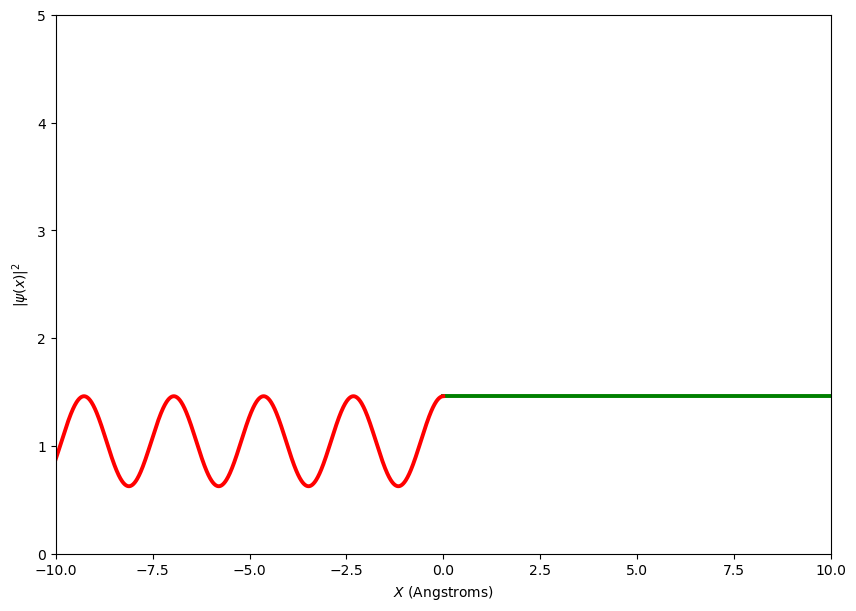

In [5]:
#coefficient, choose A=1+0i - convenient but arbitary choice.
Vo = 4 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar
#find k2 if E>Vo or beta (which we say = k2 for convenience below) if E<Vo
if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  #this is really beta but for convenience use k2
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  #the phase angle between real and imaginary components when E<Vo 
  phi = np.arctan(k2/k1)

fig, ax = plt.subplots(figsize=(10,7))

#An array of X values in region I and II
X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,0,5])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$|\psi(x)|^2$')

#calculate the wavefunction and plot the graphs, conditional on E>Vo or not

if((E-Vo)>0):
  ax.plot(X_II,0*X_II+((2*k1/(k1+k2))**2), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_I, (1+((k1-k2)/(k1+k2))**2+2*((k1-k2)/(k1+k2))*np.cos(2*k1*X_I)), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
else:
  ax.plot(X_II,(4*np.cos(phi)*np.cos(phi)*np.exp(-2*k2*X_II)), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_I,(2+2*np.cos(2*k1*X_I+2*phi)), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
 
ax.margins(0.00)
#plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

*Figure:* The probability density function of a beam of particles incident on a potential step. The energy of the step is less than the energy of the particles. This is for the same conditions as the combined plot given in the previous figure.

All of the above plots show the situation where the energy of the incoming particles is greater than the step height. In the next figure the energy of the incident particles is less that the step height. 

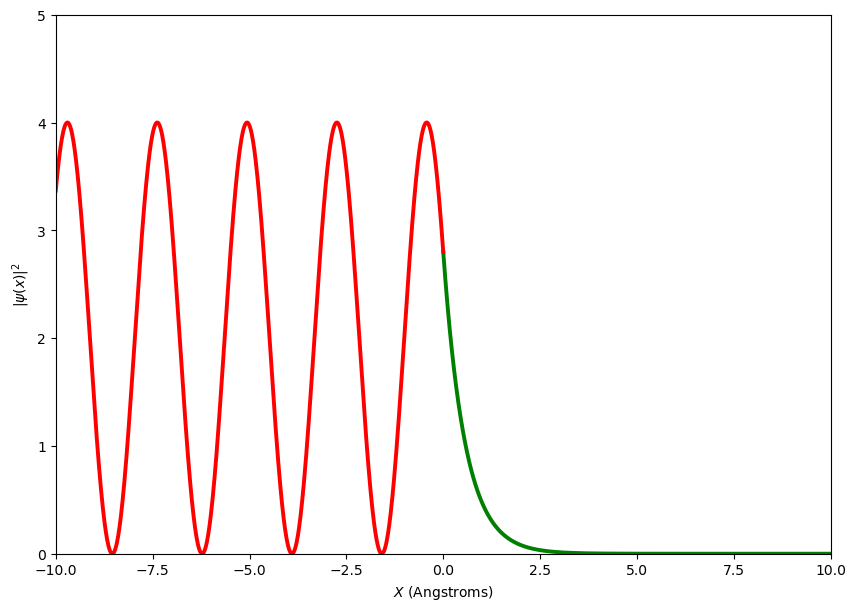

In [6]:
#coefficient, choose A=1+0i - convenient but arbitary choice.
Vo = 10 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar
#find k2 if E>Vo or beta (which we say = k2 for convenience below) if E<Vo
if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  #this is really beta but for convenience use k2
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  #the phase angle between real and imaginary components when E<Vo 
  phi = np.arctan(k2/k1)

fig, ax = plt.subplots(figsize=(10,7))

#An array of X values in region I and II
X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0, L, 900,endpoint=True)
ax.axis([-L,L,0,5])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$|\psi(x)|^2$')

#calculate the wavefunction and plot the graphs, conditional on E>Vo or not

if((E-Vo)>0):
  ax.plot(X_II,0*X_II+((2*k1/(k1+k2))**2), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_I, (1+((k1-k2)/(k1+k2))**2+2*((k1-k2)/(k1+k2))*np.cos(2*k1*X_I)), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
else:
  ax.plot(X_II,(4*np.cos(phi)*np.cos(phi)*np.exp(-2*k2*X_II)), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_I,(2+2*np.cos(2*k1*X_I+2*phi)), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
 
ax.margins(0.00)
#plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

*Figure:* The probability density function of a beam of particles incident on a potential step. The energy of the step has been increased over the previous plot and is now greater than the energy of the particles. Note the difference in the PDF after the step, the function decays of exponentially, this in the next section will be used to explain the effect called Quantum Mechanical Tunnelling.

Note in the figure above, the probability density function does not go to zero for $x>0$, this is a quantum mechanical situation that is not seen in classical mechanics. The particle seems to be entering a forbidden region. We will return to this and the consequences in the next section called Quantum Mechanical Tunnelling. 

## Transmission and reflection at the step

Above we found an expression relating the coefficients in the wave function:

$$\frac{B}{A}=\frac{k_1-k_2}{k_1+k_2}$$

and

$$\frac{C}{A}=\frac{2k_1}{k_1+k_2}$$

We will define a quantity called the reflection coefficient as the the ratio of the number of particle passing a point x  per second(that is before the barrier) moving in the negative x direction to the number of particle passing a point x  per second (that is before the barrier) moving in the positive x direction. That is given by $\frac{|B|^2 v_1}{|A|^2 v_1}$, where $v_1$ is the velocity in region 1.

$$R=\frac{|B|^2}{|A|^2}=\left(\frac{k_1-k_2}{k_1+k_2}\right)^2$$

and by conserving the number of particles at the boundary we can say $R+T=1$ so the transmission coefficient $T$ is:

$$T=1-R=\frac{4k_1k_2}{(k_1+k_2)^2}$$

**NB** Because the velocity of the particles in region I and region II are different the transmission coefficient, as you might expect, $T\ne\frac{|C|^2}{|A|^2}$ but is given by:

$$T=\frac{v_2|C|^2}{v_1|A|^2}=\frac{k_2|C|^2}{k_1|A|^2}$$

The above is verified by using the continuity conditions to find the ratio of $C$ to $A$ and comparing this to the transmission coefficient. We can interpret these quantities as the being relative number of particles reflected or transmitted at the step.

The transmission and reflection coefficients are plotted below as a function of energy. 

**Questions**

* What percentage of particles are transmitted when $E<V_0$?
* Is this consistent with the classical picture of particle behaviour?
* When $E>V_0$ are all particles transmitted across the step?
* Is this consistent with classical behaviour particles?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

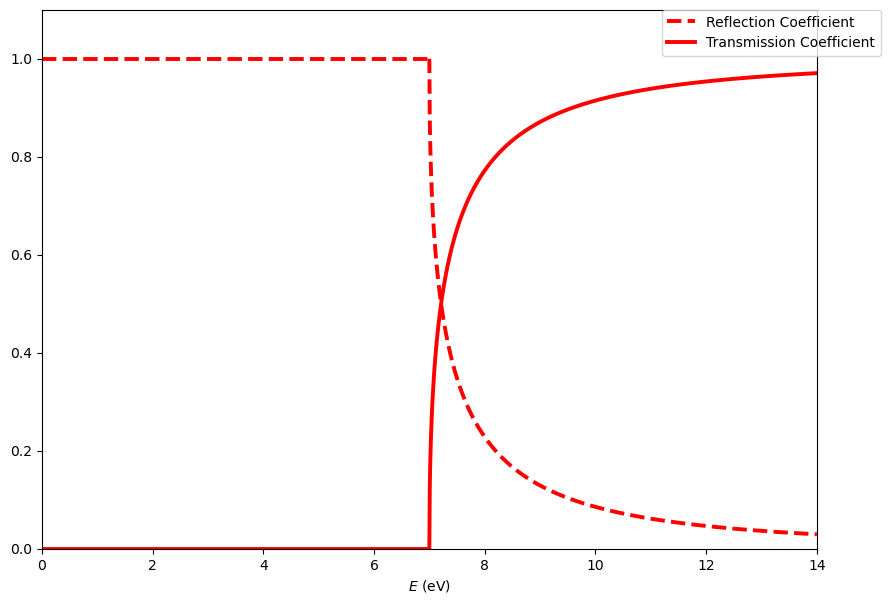

In [12]:
# Reading the input variables from the user
Vo = 7 #float(input("Enter the value for Vo (in eV) = "))

hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters




fig, ax = plt.subplots(figsize=(10,7))

if(Vo>0):
  E_above = np.linspace(Vo, 2*Vo, 900,endpoint=True)
  E_below = np.linspace(0, Vo, 900,endpoint=True)
  ax.axis([0,2*Vo,0,1.1])
else:
  E_above = np.linspace(0, -2*Vo, 900,endpoint=True)
  E_below = 0#np.linspace(0, Vo, 900,endpoint=True)    
ax.set_xlabel(r'$E$ (eV)')

ax.plot(E_above,((np.sqrt(E_above)-np.sqrt(E_above-Vo))/(np.sqrt(E_above)+np.sqrt(E_above-Vo)))**2, color="red", label="Reflection Coefficient", linestyle='dashed', linewidth=2.8)
ax.plot(E_above,1-((np.sqrt(E_above)-np.sqrt(E_above-Vo))/(np.sqrt(E_above)+np.sqrt(E_above-Vo)))**2, color="red", label="Transmission Coefficient", linestyle='solid', linewidth=2.8)
ax.plot(E_below,1+E_below*0, color="red", linestyle='dashed', linewidth=2.8)
ax.plot(E_below,E_below*0, color="red", linestyle='solid', linewidth=2.8)

ax.margins(0.00)

plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

## Time

So far we have ignored time in this problem as we are solving the time independent Schrodinger equation this seems like a reasonable thing to do, especially if we are looking at the probability distributions which will be independent of time as we showed earlier in the course. However, this problem represents a beam of particles propagating past a potential barrier so we will complete this section by looking at the wave function with the time included. Recall that the wave function had the form:

$$\Psi(x,t)=\psi(x)\psi(t)=Ae^{i(kx-\omega t)}$$

where the time component is given by:

$$\psi(t)=e^{-\omega t}$$

we have already found $\psi(x)$ so we can now multiply by $\psi(t)$ and see what happens to the wave function.

The figure below contains a 3D plot showing the $x$ position plotted as a function of the real and imaginary parts of the wave function. A movie will play showing the propagation with time. 

**Questions**

* How does the behaviour of the wave function change when you compare $E>V_0$ to $E<V_0$?
* How does you answer to the previous question relate to the flux of the particles?
** remember that that the flux will have a incident, reflected and possibly a transmitted component.

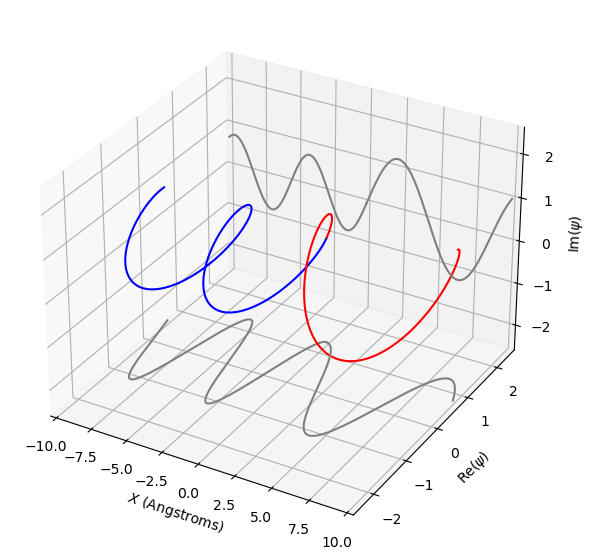

In [11]:
#import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

# Reading the input variables from the user
Vo = 3 #float(input("Enter the value for Vo (in eV) = "))
E =  5 #float(input("Enter the value for E (in eV) = "))

if(Vo>E):
  Vmax = Vo+2
else:
  Vmax = E+2

if(Vo>0):
  Vmin = 0
else:
  Vmin = Vo-2

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#could probably streamline this bit, something to think about later. 
#def update(i):
#clear the axes before each update
#plt.cla()
i=0
X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0, L, 900,endpoint=True)
#time part of wavefunction 
psi_time = P2R(1,-2*np.pi*i/20)

if((E-Vo)>0):
  #space part of wf
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=A*(k1-k2)/(k1+k2)
  C=A*2*k1/(k1+k2)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)
  psi_I  = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  #psi_II = Cexp(-ik_2x)
  psi_II = P2R(C,k2*X_II)
  
  #construct the total wavefunction and take real/imaginary parts
  psi_re_II = np.real(psi_II*psi_time)
  psi_im_II = np.imag(psi_II*psi_time)
  psi_re_I =  np.real(psi_I*psi_time)
  psi_im_I =  np.imag(psi_I*psi_time)
else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  B=P2R(A,-2*phi)
  C=A*2*np.cos(phi)*P2R(1,-1*phi)
  #psi_I = Aexp(ik_1x)+Bexp(ik_1x)  
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  #psi_II = Cexp(-k_2x) (NB: exp term is real!! only C is complex)
  psi_II = C*np.exp(-1*k2*X_II)
  
  #construct the total wavefunction and take real/imaginary parts   
  psi_re_II = np.real(psi_II*psi_time)
  psi_im_II = np.imag(psi_II*psi_time)
  psi_re_I  = np.real(psi_I*psi_time)
  psi_im_I  = np.imag(psi_I*psi_time)
 
#axis details and titles
ax.set_xlim([-L, L])
ax.set_ylim([-2.5,2.5])
ax.set_zlim([-2.5,2.5])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'Re($\psi$) ')
ax.set_zlabel(r'Im($\psi$) ')

plot = ax.plot(X_I, psi_re_I, psi_im_I,color='blue')
#projections on RE and IM plane
if((E-Vo)>0):
  plot = ax.plot(X_I, psi_re_I, psi_im_I*0-2.5, color='gray')
  plot = ax.plot(X_I, psi_re_I*0+2.5, psi_im_I, color='gray')

  plot = ax.plot(X_II, psi_re_II, psi_im_II, color='red')
  #projections on RE and IM plane
if((E-Vo)>0):
  plot = ax.plot(X_II, psi_re_II, psi_im_II*0-2.5, color='gray')
  plot = ax.plot(X_II, psi_re_II*0+2.5, psi_im_II, color='gray')


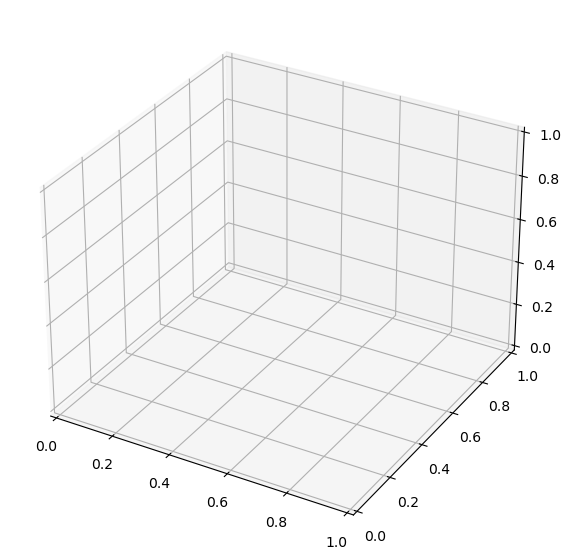

In [3]:
#import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from myst_nb import glue

# Reading the input variables from the user
Vo = 7 #float(input("Enter the value for Vo (in eV) = "))
E =  5 #float(input("Enter the value for E (in eV) = "))

if(Vo>E):
  Vmax = Vo+2
else:
  Vmax = E+2

if(Vo>0):
  Vmin = 0
else:
  Vmin = Vo-2

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#could probably streamline this bit, something to think about later. 
def update(i):
  #clear the axes before each update
  plt.cla()
  X_I = np.linspace(-L, 0, 900,endpoint=True)
  X_II = np.linspace(0, L, 900,endpoint=True)

  #time part of wavefunction 
  psi_time = P2R(1,-2*np.pi*i/20)

  if((E-Vo)>0):
    #space part of wf
    #coefficients, choose A=1+0i - convenient but arbitary choice.
    A=1
    B=A*(k1-k2)/(k1+k2)
    C=A*2*k1/(k1+k2)
    #psi_I = Aexp(ik_1x)+Bexp(ik_1x)
    psi_I  = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
    #psi_II = Cexp(-ik_2x)
    psi_II = P2R(C,k2*X_II)
    
    #construct the total wavefunction and take real/imaginary parts
    psi_re_II = np.real(psi_II*psi_time)
    psi_im_II = np.imag(psi_II*psi_time)
    psi_re_I =  np.real(psi_I*psi_time)
    psi_im_I =  np.imag(psi_I*psi_time)
  else:
    #coefficients, choose A=1+0i - convenient but arbitary choice.
    A=1
    B=P2R(A,-2*phi)
    C=A*2*np.cos(phi)*P2R(1,-1*phi)
    #psi_I = Aexp(ik_1x)+Bexp(ik_1x)  
    psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
    #psi_II = Cexp(-k_2x) (NB: exp term is real!! only C is complex)
    psi_II = C*np.exp(-1*k2*X_II)
    
    #construct the total wavefunction and take real/imaginary parts   
    psi_re_II = np.real(psi_II*psi_time)
    psi_im_II = np.imag(psi_II*psi_time)
    psi_re_I  = np.real(psi_I*psi_time)
    psi_im_I  = np.imag(psi_I*psi_time)
 
  #axis details and titles
  ax.set_xlim([-L, L])
  ax.set_ylim([-2.5,2.5])
  ax.set_zlim([-2.5,2.5])
  ax.set_xlabel(r'$X$ (Angstroms)')
  ax.set_ylabel(r'Re($\psi$) ')
  ax.set_zlabel(r'Im($\psi$) ')

  plot = ax.plot(X_I, psi_re_I, psi_im_I,color='blue')
  #projections on RE and IM plane
  if((E-Vo)>0):
    plot = ax.plot(X_I, psi_re_I, psi_im_I*0-2.5, color='gray')
    plot = ax.plot(X_I, psi_re_I*0+2.5, psi_im_I, color='gray')

  plot = ax.plot(X_II, psi_re_II, psi_im_II, color='red')
  #projections on RE and IM plane
  if((E-Vo)>0):
    plot = ax.plot(X_II, psi_re_II, psi_im_II*0-2.5, color='gray')
    plot = ax.plot(X_II, psi_re_II*0+2.5, psi_im_II, color='gray')
  return plot

ax.margins(0.00)
n=200
anim = animation.FuncAnimation(fig, update, frames=n//10, interval=2000/(n//10))
anim.save('wavefuncscatter.gif', writer='pillow')
#plt.show()
#glue("boot_fig", anim, display=False)
#video = anim.to_html5_video()
#html = display.HTML(video)
#display.display(html)
#plt.close()

![wavefuncscatter_fig](wavefuncscatter.gif "wavefuncscatter_fig")

*Figure:* The time dependent wavefunction for a particle incident on a potential step. The energy of the particle is less than the potential energy of the step.

## Quantum Mechanical Tunnelling

Now we will consider what happens if the potential energy returns back to zero before the probability density function has decayed to zero. *Of course it will never be zero so we really mean that it is much less than the value at the point the wave function interacts with the barrier.* In this problem the potential is:

$$\begin{array}[cc]
\\
V=0 & 0 > x\\
V=V_0 & 0\le x\le a\\
V=0 & a < x\\
\end{array}$$

$a$ will be small enough so that the probability density function is much larger than zero. When $E<V$ our wave functions are:

$$
\begin{array}[cc]
\\
\psi(x)=Ae^{ik_1x}+Be^{-ik_1x} & 0>x\\
\psi(x)=Ce^{-\beta x}+De^{\beta x} & 0\le x\le a\\
\psi(x)=Fe^{ik_1x}& a<x\\
\end{array}
$$

Notice here we include the $De^{\beta x}$ term as the wave function can no longer propagate to infinity hence there must be a reflected term. Once again, we solve these equations simultaneously to obtain ratios of each coefficient. 

When $E>V$ our wave functions are:

$$
\begin{array}[cc]
\\
\psi(x)=Ae^{ik_1x}+Be^{-ik_1x} & 0>x\\
\psi(x)=Ce^{-ik_2 x}+De^{ik_2 x} & 0\le x\le a\\
\psi(x)=Fe^{ik_1x}& a<x\\
\end{array}
$$

The TISE is:

$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)+U\psi(x)=E\psi(x)$$

For $x<0$ and $x>a$ we know $U=0$. Substituting this into the TISE and the wave function for the appropriate region we can find an expression for $k_1$ in terms of energy. For $x<0$ this is:

$$
\frac{-\hbar^2}{2m}&\frac{d^2}{dx^2}(Ae^{ik_1x}+Be^{-ik_1x})+0(Ae^{ik_1x}+Be^{-ik_1x})=\\
\frac{-\hbar^2}{2m}&(-k_1^2(Ae^{ik_1x}+Be^{-ik_1x}))=E(Ae^{ik_1x}+Be^{-ik_1x})
$$

cancel common factors and make $k_1$ the subject we find:


$$
k_1=\sqrt{\frac{2mE}{\hbar}}
$$

I will leave the algebraic manipulations to show $k_1$ in the region $x>a$ is the same as an exercise for you. Note, there is a slight challenge for region $II$ when $E>V_0$ then $k_2$ will have the form:

$$
k_2=\sqrt{\frac{2m(E-V)}{\hbar}}
$$

And when $E<V_0$ then $k_2$ will have the form:

$$
k_2=i\sqrt{\frac{2m(V-E)}{\hbar}}=\beta
$$.

Otherwise the method for determining these values is identical to the process used above.

Provided below are plots of the wave functions, probability density and probability density overlaid on the potential barrier for particles tunneling through a potential barrier. These are for a beam of electrons with energy 7 eV, incident on a potential step of 9 eV of width 3 Angstroms.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GLKEZDDZJrMdExEAiSIsr-05jxkT5jWK)

In [7]:
# Reading the input variables from the user
Vo = 9 #float(input("Enter the value for Vo (in eV) = "))
E =  7 #float(input("Enter the value for E (in eV) = "))
a = 3 #float(input("Enter barrier width a (in Angstroms) = "))

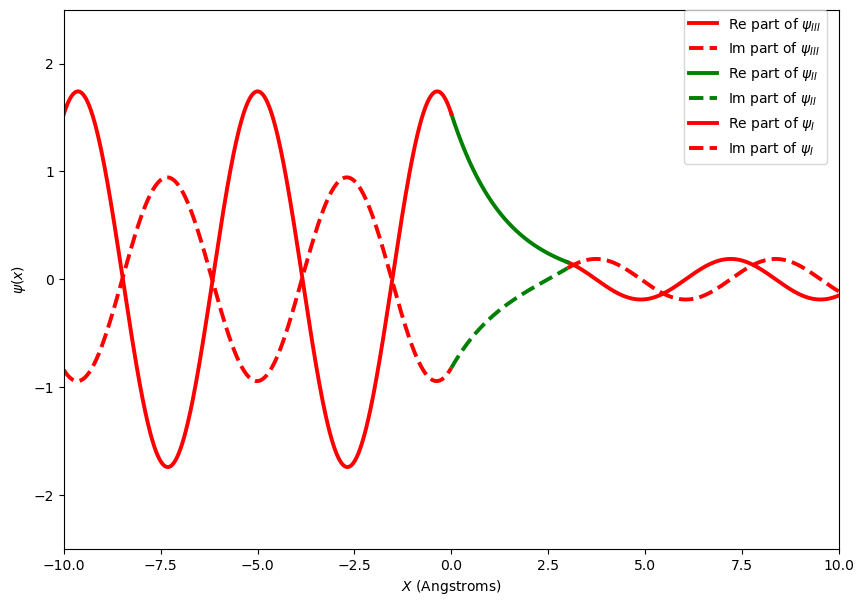

In [8]:
L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar
#find k2 if E>Vo or beta (which we say = k2 for convenience below) if E<Vo
if((E-Vo)>0):
  #sys.exit("E>Vo not implemented yet!!")
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  #this is really beta but for convenience use k2
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  #the phase angle between real and imaginary components when E<Vo 
  phi = np.arctan(k2/k1)

fig, ax = plt.subplots(figsize=(10,7))

#An array of X values in region I and II
X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II = np.linspace(0,a, 900,endpoint=True)
X_III = np.linspace(a, L, 900,endpoint=True)
ax.axis([-L,L,-2.5,2.5])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$\psi(x)$')
#calculate the wavefunction and plot the graphs, conditional on E>Vo or not

if((E-Vo)>0):
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4/(P2R((1-(k2/k1))*(1-(k1/k2)),(k2+k1)*a)+P2R((1+(k2/k1))*(1+(k1/k2)),-(k2-k1)*a))
  C=F*0.5*(1-(k1/k2))*P2R(1,1*k2*a)*P2R(1,k1*a)
  D=F*0.5*(1+(k1/k2))*P2R(1,-1*k2*a)*P2R(1,k1*a)
  B=0.5*(1+(k2/k1))*C+0.5*(1-(k2/k1))*D
  A=0.5*(1-(k2/k1))*C+0.5*(1+(k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  psi_II = P2R(C,-1*k2*X_II)+P2R(D,1*k2*X_II)
  psi_III =  P2R(F,k1*(X_III))
  ax.plot(X_III,np.real(psi_III), color="red", label="Re part of $\psi_{III}$", linewidth=2.8)
  ax.plot(X_III,np.imag(psi_III), color="red", label="Im part of $\psi_{III}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_II,np.real(psi_II), color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II), color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I), color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I), color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)
else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4*P2R(1,-1*k1*a)/((1+(1j*k2/k1))*(1-(1j*k1/k2))*np.exp(k2*a)+(1-(1j*k2/k1))*(1+(1j*k1/k2))*np.exp(-k2*a))
  C=0.5*(1-(1j*k1/k2))*F*np.exp(1*k2*a)*P2R(1,k1*a)  
  D=0.5*(1+(1j*k1/k2))*F*np.exp(-1*k2*a)*P2R(1,k1*a)
  B=-0.5*(-1+(1j*k2/k1))*C+0.5*(1+(1j*k2/k1))*D
  A=0.5*(1+(1j*k2/k1))*C+0.5*(1-(1j*k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  psi_II = C*np.exp(-1*k2*X_II)+D*np.exp(1*k2*X_II)
  psi_III =  F*P2R(1,k1*(X_III))
  ax.plot(X_III,np.real(psi_III), color="red", label="Re part of $\psi_{III}$", linewidth=2.8)
  ax.plot(X_III,np.imag(psi_III), color="red", label="Im part of $\psi_{III}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_II,np.real(psi_II), color="green", label="Re part of $\psi_{II}$", linewidth=2.8)
  ax.plot(X_II,np.imag(psi_II), color="green", label="Im part of $\psi_{II}$", linestyle='dashed', linewidth=2.8)
  ax.plot(X_I,np.real(psi_I), color="red", label="Re part of $\psi_{I}$", linewidth=2.8)
  ax.plot(X_I,np.imag(psi_I), color="red", label="Im part of $\psi_{I}$", linestyle='dashed', linewidth=2.8)
  
ax.margins(0.00)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

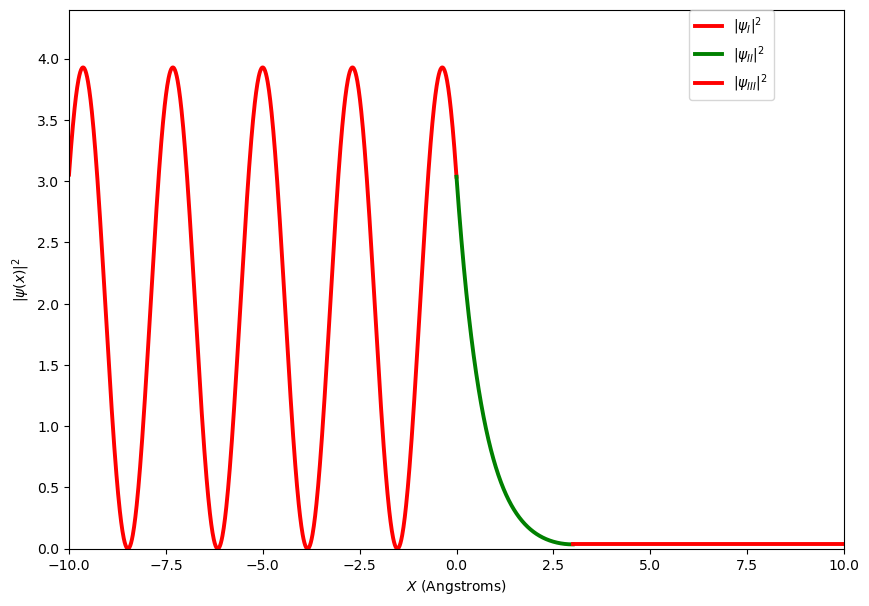

In [9]:
Vmin = 0
Vmax = 4
L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)

fig, ax = plt.subplots(figsize=(10,7))

ax.xaxis.tick_bottom()

X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II =  np.linspace(0, a, 900,endpoint=True)
X_III = np.linspace(a, L, 900,endpoint=True)
ax.axis([-L,L,1.1*Vmin,1.1*Vmax])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$|\psi(x)|^2$')

if((E-Vo)>0):
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4/(P2R((1-(k2/k1))*(1-(k1/k2)),(k2+k1)*a)+P2R((1+(k2/k1))*(1+(k1/k2)),-(k2-k1)*a))
  C=F*0.5*(1-(k1/k2))*P2R(1,1*k2*a)*P2R(1,k1*a)
  D=F*0.5*(1+(k1/k2))*P2R(1,-1*k2*a)*P2R(1,k1*a)
  B=0.5*(1+(k2/k1))*C+0.5*(1-(k2/k1))*D
  A=0.5*(1-(k2/k1))*C+0.5*(1+(k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  psi_II = P2R(C,-1*k2*X_II)+P2R(D,1*k2*X_II)
  psi_III =  P2R(F,k1*(X_III))
  ax.plot(X_I,(np.real(psi_I)**2+np.imag(psi_I)**2), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
  ax.plot(X_II,(np.real(psi_II)**2+np.imag(psi_II)**2), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_III,(np.real(psi_III)**2+np.imag(psi_III)**2), color="red", label="|$\psi_{III}|^2$", linewidth=2.8)

else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4*P2R(1,-1*k1*a)/((1+(1j*k2/k1))*(1-(1j*k1/k2))*np.exp(k2*a)+(1-(1j*k2/k1))*(1+(1j*k1/k2))*np.exp(-k2*a))
  C=0.5*(1-(1j*k1/k2))*F*np.exp(1*k2*a)*P2R(1,k1*a)  
  D=0.5*(1+(1j*k1/k2))*F*np.exp(-1*k2*a)*P2R(1,k1*a)
  B=-0.5*(-1+(1j*k2/k1))*C+0.5*(1+(1j*k2/k1))*D
  A=0.5*(1+(1j*k2/k1))*C+0.5*(1-(1j*k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  psi_II = C*np.exp(-1*k2*X_II)+D*np.exp(1*k2*X_II)
  psi_III =  F*P2R(1,k1*(X_III))
  ax.plot(X_I,(np.real(psi_I)**2+np.imag(psi_I)**2), color="red", label="|$\psi_{I}|^2$", linewidth=2.8)
  ax.plot(X_II,(np.real(psi_II)**2+np.imag(psi_II)**2), color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_III,(np.real(psi_III)**2+np.imag(psi_III)**2), color="red", label="|$\psi_{III}|^2$", linewidth=2.8)

ax.margins(0.00)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

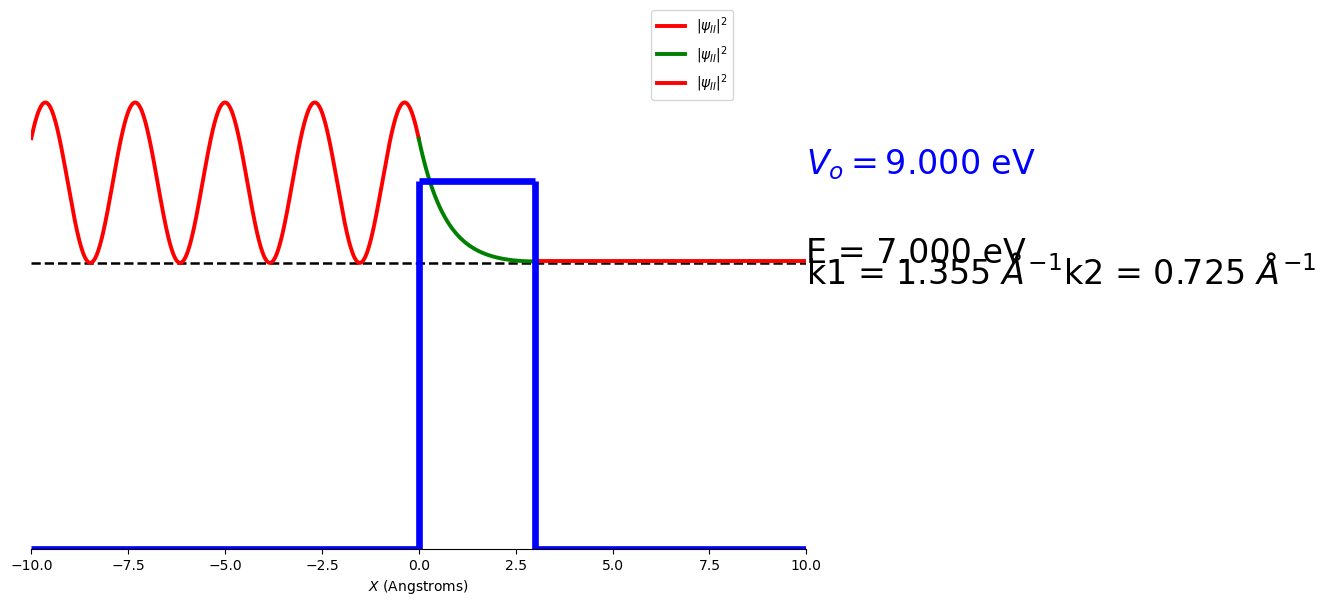

In [10]:
if(Vo>E):
  Vmax = Vo+2
else:
  Vmax = E+2

if(Vo>0):
  Vmin = 0
else:
  Vmin = Vo-2

L=10

k1 = np.sqrt(2*melec*E*eVtoJ)*AngstromtoMeter/hbar

if((E-Vo)>0):
  k2 = np.sqrt(2*melec*(E-Vo)*eVtoJ)*AngstromtoMeter/hbar
else:
  k2 = np.sqrt(2*melec*(Vo-E)*eVtoJ)*AngstromtoMeter/hbar
  phi = np.arctan(k2/k1)




fig, ax = plt.subplots(figsize=(10,7))

ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')

X_I = np.linspace(-L, 0, 900,endpoint=True)
X_II =  np.linspace(0, a, 900,endpoint=True)
X_III = np.linspace(a, L, 900,endpoint=True)
ax.axis([-L,L,1.2*Vmin,1.2*Vmax])
ax.set_xlabel(r'$X$ (Angstroms)')
ax.set_ylabel(r'$E and |\psi(x)|^2$')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
str2=r"k1 = %3.3f $\AA^{-1}$"%(k1)+r"k2 = %3.3f $\AA^{-1}$"%(k2)
ax.text(2.0*L/2.0, E-0.5, str2, fontsize=24, color="black")

ax.hlines(E, -L, L, linewidth=1.8, linestyle='--', color="black")
str1="E = %.3f eV"%(E)
ax.text(2.0*L/2.0, E, str1, fontsize=24, color="black")

if((E-Vo)>0):
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4/(P2R((1-(k2/k1))*(1-(k1/k2)),(k2+k1)*a)+P2R((1+(k2/k1))*(1+(k1/k2)),-(k2-k1)*a))
  C=F*0.5*(1-(k1/k2))*P2R(1,1*k2*a)*P2R(1,k1*a)
  D=F*0.5*(1+(k1/k2))*P2R(1,-1*k2*a)*P2R(1,k1*a)
  B=0.5*(1+(k2/k1))*C+0.5*(1-(k2/k1))*D
  A=0.5*(1-(k2/k1))*C+0.5*(1+(k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+P2R(B,-1*k1*X_I)
  psi_II = P2R(C,-1*k2*X_II)+P2R(D,1*k2*X_II)
  psi_III =  P2R(F,k1*(X_III))
  ax.plot(X_I,(np.real(psi_I)**2+np.imag(psi_I)**2)+E, color="red", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_II,(np.real(psi_II)**2+np.imag(psi_II)**2)+E, color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_III,(np.real(psi_III)**2+np.imag(psi_III)**2)+E, color="red", label="|$\psi_{II}|^2$", linewidth=2.8)

else:
  #coefficients, choose A=1+0i - convenient but arbitary choice.
  A=1
  #related all coefficients to F, 
  F=4*P2R(1,-1*k1*a)/((1+(1j*k2/k1))*(1-(1j*k1/k2))*np.exp(k2*a)+(1-(1j*k2/k1))*(1+(1j*k1/k2))*np.exp(-k2*a))
  C=0.5*(1-(1j*k1/k2))*F*np.exp(1*k2*a)*P2R(1,k1*a)  
  D=0.5*(1+(1j*k1/k2))*F*np.exp(-1*k2*a)*P2R(1,k1*a)
  B=-0.5*(-1+(1j*k2/k1))*C+0.5*(1+(1j*k2/k1))*D
  A=0.5*(1+(1j*k2/k1))*C+0.5*(1-(1j*k2/k1))*D   #check the algebra is right!! 
  psi_I = P2R(A,k1*X_I)+B*P2R(1,-1*k1*X_I)
  psi_II = C*np.exp(-1*k2*X_II)+D*np.exp(1*k2*X_II)
  psi_III =  F*P2R(1,k1*(X_III))
  ax.plot(X_I,(np.real(psi_I)**2+np.imag(psi_I)**2)+E, color="red", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_II,(np.real(psi_II)**2+np.imag(psi_II)**2)+E, color="green", label="|$\psi_{II}|^2$", linewidth=2.8)
  ax.plot(X_III,(np.real(psi_III)**2+np.imag(psi_III)**2)+E, color="red", label="|$\psi_{II}|^2$", linewidth=2.8)

ax.margins(0.00)
ax.vlines(0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(a, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L, 0, linewidth=4.8, color="blue")
ax.hlines(Vo, 0, a, linewidth=4.8, color="blue")
ax.hlines(0, a, L, linewidth=4.8, color="blue")
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

You may notice that both the wave function and the probability density decay exponentially inside the potential barrier. If the barrier is not too wide the wave function will be much larger than zero at $x=3$ Angstroms and gives a significant probability of the particle being found on the right of the barrier. This process is called quantum mechanical tunnelling and explains processes like Nuclear Fusion, Alpha particle decay. It has even been used more recently to explain the processes involved in sight. Technologies such as Tunnelling Diodes and Scanning Tunnelling Microscopy would not be possible if this did not occur. 

## Tunnelling probability

Just as we did for the potential step we can determine the flux of particles that pass through the barrier when $E<V$. This is done by applying the boundary conditions for the wave function and its derivative at $x=0$ and $x=a$, where $a$ is the width of the barrier.

$$
\psi_I(0)&=\psi_II(0)\\
\psi^\prime_I(0)&=\psi^\prime_II(0)
$$

Which gives us

$$
A+B&=C+D & ~~~(1) \\
ik_1(A-B)&=\beta(D-C) & ~~~(2)
$$

Solve (1) and (2) simultaneously, 2$\times$(1)+(2) to give

$$
4A=\left(1+\frac{i\beta}{k_1}\right)2C+\left(1-\frac{i\beta}{k_1}\right)2D 
$$

and 

$$
\psi_I(a)&=\psi_II(a)\\
\psi^\prime_I(a)&=\psi^\prime_II(a)
$$

Which gives us

$$
Ce^{-\beta a}+De^{\beta a}&=Fe^{ik_1 a} & ~~~(3) \\
\beta \left(De^{-\beta a}-Ce^{\beta a} \right)&=ik_1 Fe^{ik_1 a} & ~~~(4)
$$

Solve (3) and (4) simultaneously to find expressions for $C$ and $D$.

$$
2D&=\left(1+\frac{ik_1}{\beta}\right)Fe^{ik_1-\beta a} & ~~~(3)+(4)\\
2C&=\left(1-\frac{ik_1}{\beta}\right)Fe^{ik_1+\beta a} & ~~~(3)-(4)
$$

Substitute these solutions into the equation for 2$\times$(1)+(2) found above. 

$$
4A=\left[ \left( 1+\frac{i\beta}{k_1} \right) \left(1-\frac{ik_1}{\beta} \right) e^{\beta a}+ \left( 1-\frac{i\beta}{k_1} \right) \left( 1+\frac{ik_1}{\beta}\right)e^{-\beta a}\right]Fe^{ik_1 a}
$$

Use of sinh and cosh exponential identities and the relationships between $k_1$, $\beta$ and $E$ quickly gives:

$$
T=\frac{F^*F k_1}{A^*A k_1}= \left[1+\frac{V \sinh^2(\beta a)}{4E(V-E))}\right]^{-1}
$$

